<a href="https://colab.research.google.com/github/caiom26/AnaliseDeDados/blob/main/Desafio6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/streaming_data.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


Data Understanding





Target:
Churned(implica em dizer se o cliente deixou ou não a plataforma)



Features Numéricas:
Age: idade do Usuário
Tempo na Plataforma: tempo em horas que o usuário utilizou a plataforma
Devices conectados: quantidade de aparelhos conectados a plataforma
Num_streaming_services: Número de serviços de streaming que o usuário possui além desse
Num_active_profiles: Número de perfis ativos
Avg_rating: nota média que o usuário deu ao conteudo disponível na plataforma


Features Categóricas :
Gender: auto explicativo
Subscription Type: Tipo de assinatura, assinatura mais completa, com todos os serviços disponíveis, intermediária com alguns beneficios e a básica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
df=df.dropna(subset=['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63368 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     54150 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        45923 non-null  float64
 3   Devices_connected       42938 non-null  float64
 4   Subscription_type       42795 non-null  object 
 5   Num_streaming_services  7789 non-null   float64
 6   Num_active_profiles     63368 non-null  int64  
 7   Avg_rating              49278 non-null  float64
 8   Churned                 49710 non-null  float64
 9   User_id                 63368 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.3+ MB


In [ ]:
df=df.dropna(subset='Age')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54150 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     54150 non-null  float64
 1   Gender                  54150 non-null  object 
 2   Time_on_platform        39215 non-null  float64
 3   Devices_connected       36638 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  6693 non-null   float64
 6   Num_active_profiles     54150 non-null  int64  
 7   Avg_rating              42137 non-null  float64
 8   Churned                 42473 non-null  float64
 9   User_id                 54150 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
rows_with_nulls = df[df['Subscription_type'].isnull()]
print(rows_with_nulls)

        Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
6      62.0  Female            5569.0                2.0               NaN   
7      56.0    Male             462.0                1.0               NaN   
8      25.0  Female            3783.0                3.0               NaN   
10     56.0    Male            7258.0                5.0               NaN   
19     60.0  Female            8503.0                NaN               NaN   
...     ...     ...               ...                ...               ...   
77860  56.0  Female            4475.0                1.0               NaN   
77862  35.0  Female               NaN                NaN               NaN   
77868  26.0    Male               NaN                2.0               NaN   
77872  26.0  Female            6165.0                4.0               NaN   
77877  43.0    Male            6721.0                1.0               NaN   

       Num_streaming_services  Num_active_profiles  Avg_rating 

In [ ]:
df.Num_streaming_services=df.Num_streaming_services.fillna(0)
df.Time_on_platform=df.Time_on_platform.fillna(0)
df.Devices_connected=df.Devices_connected.fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54150 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     54150 non-null  float64
 1   Gender                  54150 non-null  object 
 2   Time_on_platform        54150 non-null  float64
 3   Devices_connected       54150 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  54150 non-null  float64
 6   Num_active_profiles     54150 non-null  int64  
 7   Avg_rating              42137 non-null  float64
 8   Churned                 42473 non-null  float64
 9   User_id                 54150 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
dfparaanalise=df.copy()
dfparaanalise.dropna(subset=['Subscription_type'],inplace=True)
dfparaanalise.dropna(subset=['Avg_rating'],inplace=True)
dfparaanalise.fillna(0,inplace=True)
dfparaanalise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28446 entries, 1 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     28446 non-null  float64
 1   Gender                  28446 non-null  object 
 2   Time_on_platform        28446 non-null  float64
 3   Devices_connected       28446 non-null  float64
 4   Subscription_type       28446 non-null  object 
 5   Num_streaming_services  28446 non-null  float64
 6   Num_active_profiles     28446 non-null  int64  
 7   Avg_rating              28446 non-null  float64
 8   Churned                 28446 non-null  float64
 9   User_id                 28446 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.4+ MB


In [ ]:
churn_agg = dfparaanalise.groupby("Churned")['User_id'].count().reset_index()
churn_agg = pd.DataFrame(churn_agg)
churn_agg

,Churned,User_id
0,0.0,22890
1,1.0,5556


<Axes: xlabel='Churned', ylabel='User_id'>

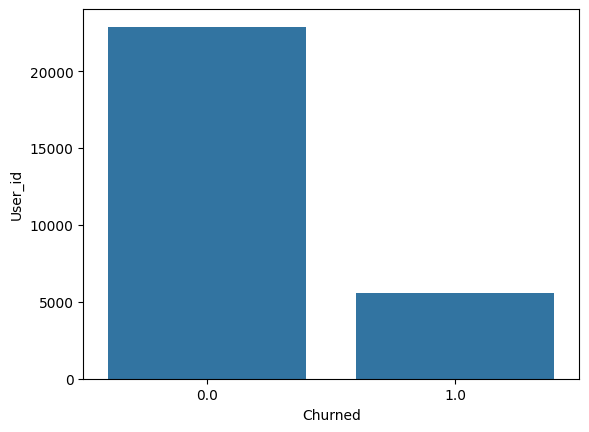

In [ ]:
sns.barplot(data=churn_agg, x = "Churned",y = "User_id")

In [ ]:
churn_agg1=dfparaanalise.groupby(['Churned','Subscription_type'])['User_id'].count().reset_index()
churn_agg1=pd.DataFrame(churn_agg1)
churn_agg1

,Churned,Subscription_type,User_id
0,0.0,Basic,7520
1,0.0,Premium,7697
2,0.0,Standard,7673
3,1.0,Basic,1880
4,1.0,Premium,1835
5,1.0,Standard,1841


In [ ]:
churnagg2=dfparaanalise.groupby(['Churned','Gender'])['User_id'].count().reset_index()
churnagg2=pd.DataFrame(churnagg2)
churnagg2

,Churned,Gender,User_id
0,0.0,Female,11401
1,0.0,Male,11489
2,1.0,Female,2747
3,1.0,Male,2809


In [ ]:
churnagg3=dfparaanalise.groupby(['Churned','Num_streaming_services'])['User_id'].count().reset_index()
churnagg3=pd.DataFrame(churnagg3)
churnagg3

,Churned,Num_streaming_services,User_id
0,0.0,0.0,20048
1,0.0,1.0,703
2,0.0,2.0,756
3,0.0,3.0,680
4,0.0,4.0,703
5,1.0,0.0,4819
6,1.0,1.0,180
7,1.0,2.0,198
8,1.0,3.0,177
9,1.0,4.0,182


In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
dfparaanalise=dfparaanalise.drop(['User_id'],axis=1)
categorical_columns = dfparaanalise.select_dtypes(include=['object']).columns.tolist()
numerical_columns = dfparaanalise.select_dtypes(include=['int64', 'float64']).columns.tolist()

le=LabelEncoder()
for col in categorical_columns:
  dfparaanalise[col]=le.fit_transform(dfparaanalise[col])
dfparaanalise.head()
for col in numerical_columns:
  scaler=MinMaxScaler()
  dfparaanalise[col]=scaler.fit_transform(dfparaanalise[[col]])
dfparaanalise.head()



,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
1,1.000000,0,0.697226,0.4,2,0.00,0.00,0.2850,0.0
2,0.509804,1,0.727709,0.6,1,0.25,0.00,0.2275,1.0
9,0.058824,0,0.012787,0.4,0,0.00,0.50,0.3925,1.0
11,0.843137,1,0.615253,0.6,2,0.00,0.75,0.7300,0.0
14,0.509804,1,0.479278,0.2,0,0.00,0.50,0.3975,0.0


In [ ]:
x=dfparaanalise.drop(['Churned'],axis=1)
y=dfparaanalise['Churned']



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Regressão Logística
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
x_test.assign(churn = y_test).assign(label = lr.predict(x_test))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,churn,label
43536,0.509804,1,0.281082,1.0,0,0.0,0.00,0.6525,1.0,0.0
239,0.803922,0,0.040644,1.0,1,0.0,0.00,0.6275,1.0,0.0
39729,0.098039,0,0.112342,0.0,2,0.0,1.00,0.8500,0.0,0.0
75801,0.568627,1,0.548122,0.0,0,0.0,1.00,0.2450,1.0,0.0
52841,0.647059,0,0.240438,0.4,0,0.0,0.00,0.1375,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
67212,0.823529,1,0.000000,0.0,2,0.0,1.00,0.3900,0.0,0.0
70354,1.000000,0,0.742551,0.0,0,0.0,0.00,0.0900,1.0,0.0
28390,0.078431,1,0.192830,0.6,1,0.0,0.50,0.3025,0.0,0.0
139,0.686275,1,0.448339,1.0,2,0.0,0.00,0.5475,0.0,0.0


In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, x_test, y_test, values_format='d');

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

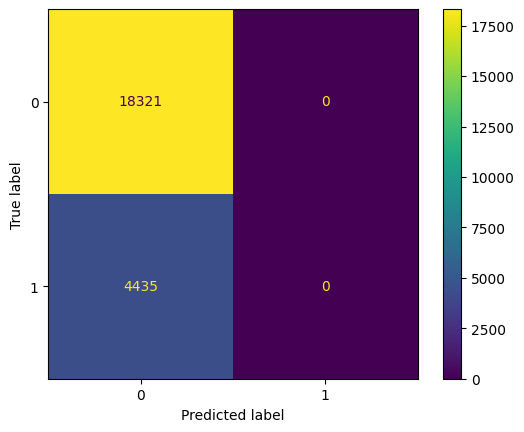

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_train, lr.predict(x_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(x_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(x_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(x_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(x_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(x_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(x_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(x_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(x_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])}")

Acurácia (Treino): 0.8051063455791879
Acurácia (Teste): 0.80298769771529
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0
Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.5122073554001615
ROCAUC (Teste): 0.50904116853113


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#RandomForest
rf =  RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
rf.predict(x_test)

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
x_test.assign(churn = y_test).assign(label = rf.predict(x_test))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,churn,label
43536,0.509804,1,0.281082,1.0,0,0.0,0.00,0.6525,1.0,0.0
239,0.803922,0,0.040644,1.0,1,0.0,0.00,0.6275,1.0,1.0
39729,0.098039,0,0.112342,0.0,2,0.0,1.00,0.8500,0.0,0.0
75801,0.568627,1,0.548122,0.0,0,0.0,1.00,0.2450,1.0,1.0
52841,0.647059,0,0.240438,0.4,0,0.0,0.00,0.1375,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
67212,0.823529,1,0.000000,0.0,2,0.0,1.00,0.3900,0.0,0.0
70354,1.000000,0,0.742551,0.0,0,0.0,0.00,0.0900,1.0,1.0
28390,0.078431,1,0.192830,0.6,1,0.0,0.50,0.3025,0.0,0.0
139,0.686275,1,0.448339,1.0,2,0.0,0.00,0.5475,0.0,0.0


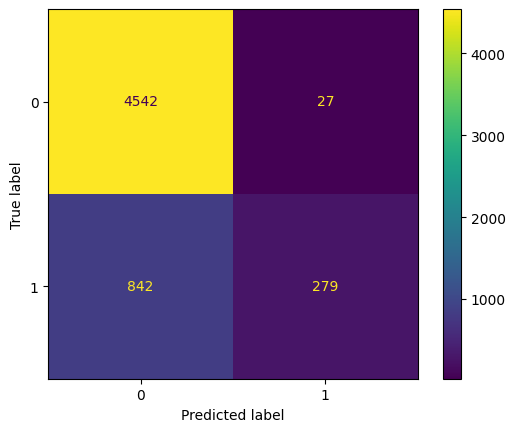

In [ ]:
cm = confusion_matrix(y_test, rf.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(x_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(x_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(x_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])}")

Acurácia (Treino): 0.9999560555457901
Acurácia (Teste): 0.8472759226713532
Acurácia Balanceada (Treino): 0.9998872604284104
Acurácia Balanceada (Teste): 0.6214877674058724
Precision (Treino): 1.0
Precision (Teste): 0.9117647058823529
Recall (Treino): 0.9997745208568207
Recall (Teste): 0.2488849241748439
F1-Score (Treino): 0.9998872477167663
F1-Score (Teste): 0.39103013314646107
ROCAUC (Treino): 0.9999999938464291
ROCAUC (Teste): 0.7046959994330173


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
x_test.assign(churn = y_test).assign(label = xgb.predict(x_test))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,churn,label
43536,0.509804,1,0.281082,1.0,0,0.0,0.00,0.6525,1.0,0
239,0.803922,0,0.040644,1.0,1,0.0,0.00,0.6275,1.0,0
39729,0.098039,0,0.112342,0.0,2,0.0,1.00,0.8500,0.0,0
75801,0.568627,1,0.548122,0.0,0,0.0,1.00,0.2450,1.0,1
52841,0.647059,0,0.240438,0.4,0,0.0,0.00,0.1375,0.0,0
...,...,...,...,...,...,...,...,...,...,...
67212,0.823529,1,0.000000,0.0,2,0.0,1.00,0.3900,0.0,0
70354,1.000000,0,0.742551,0.0,0,0.0,0.00,0.0900,1.0,1
28390,0.078431,1,0.192830,0.6,1,0.0,0.50,0.3025,0.0,0
139,0.686275,1,0.448339,1.0,2,0.0,0.00,0.5475,0.0,0


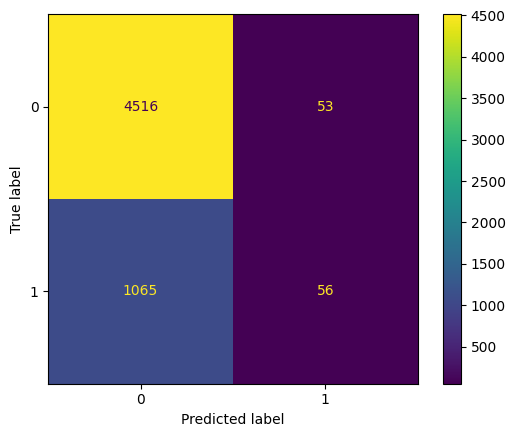

In [ ]:
cm = confusion_matrix(y_test, xgb.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(f"Acurácia (Treino): {accuracy_score(y_train, xgb.predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, xgb.predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, xgb.predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, xgb.predict(x_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, xgb.predict(x_train))}")
print(f"Precision (Teste): {precision_score(y_test, xgb.predict(x_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, xgb.predict(x_train))}")
print(f"Recall (Teste): {recall_score(y_test, xgb.predict(x_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, xgb.predict(x_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, xgb.predict(x_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, xgb.predict_proba(x_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, xgb.predict_proba(x_test)[:,1])}")

Acurácia (Treino): 0.8461065213570047
Acurácia (Teste): 0.8035149384885765
Acurácia Balanceada (Treino): 0.6066386445357183
Acurácia Balanceada (Teste): 0.5191777422567514
Precision (Treino): 0.9824198552223371
Precision (Teste): 0.5137614678899083
Recall (Treino): 0.21420518602029312
Recall (Teste): 0.049955396966993755
F1-Score (Treino): 0.3517215845982969
F1-Score (Teste): 0.09105691056910567
ROCAUC (Treino): 0.911695796748047
ROCAUC (Teste): 0.5977989589306518


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500],
            }

grid_search = GridSearchCV(rf, parameters, scoring='roc_auc', cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [ ]:
dict = grid_search.best_estimator_.get_params()

In [ ]:
print(dict)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
rf_tunned= RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 10, max_features= 'sqrt',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 500, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)
rf_tunned.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500)

In [ ]:
rf_tunned.predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
x_test.assign(churn = y_test).assign(label = rf_tunned.predict(x_test))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,churn,label
43536,0.509804,1,0.281082,1.0,0,0.0,0.00,0.6525,1.0,0.0
239,0.803922,0,0.040644,1.0,1,0.0,0.00,0.6275,1.0,0.0
39729,0.098039,0,0.112342,0.0,2,0.0,1.00,0.8500,0.0,0.0
75801,0.568627,1,0.548122,0.0,0,0.0,1.00,0.2450,1.0,0.0
52841,0.647059,0,0.240438,0.4,0,0.0,0.00,0.1375,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
67212,0.823529,1,0.000000,0.0,2,0.0,1.00,0.3900,0.0,0.0
70354,1.000000,0,0.742551,0.0,0,0.0,0.00,0.0900,1.0,0.0
28390,0.078431,1,0.192830,0.6,1,0.0,0.50,0.3025,0.0,0.0
139,0.686275,1,0.448339,1.0,2,0.0,0.00,0.5475,0.0,0.0


In [ ]:
X_train=x_train
X_test=x_test

print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8069959571102127
Acurácia (Teste): 0.80298769771529
Acurácia Balanceada (Treino): 0.504847801578354
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (Teste): 0.0
Recall (Treino): 0.009695603156708005
Recall (Teste): 0.0
F1-Score (Treino): 0.019205002233139798
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.929353579073724
ROCAUC (Teste): 0.6121996177552287
